# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Trends

1. There is a clear trend in both the northern and southern hemisphere cities that max temperature for the day increases as latitude approaches zero.

2. 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# Set base url for api calls
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='

# Generate empty lists for response values
apilats = []
apilngs = []
ktemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

# Initialize city number
citynum = 1

# Print the statement indicating the start of processing
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through each city in the list
for city in cities:
    
    # Print the log of record processing
    print(f"Processing record {str(citynum)} | {city}")
    
    # Set the specific url for current city and make the API call
    url = base_url + city + '&appid=' + weather_api_key
    response = requests.get(url).json()
    
    # Not all cities are in the API's records so references to keys will throw a KeyError
    try:
        apilats.append(response['coord']['lat'])
        apilngs.append(response['coord']['lon'])
        ktemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
    # When the entry doesn't have keys, leave that row empty
    except KeyError:
        apilats.append(None)
        apilngs.append(None)
        ktemp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        windspeed.append(None)
        country.append(None)
        date.append(None)
        
    # Iterate the counter
    citynum += 1

Beginning Data Retrieval
-----------------------------
Processing record 1 | saleaula
Processing record 2 | laguna
Processing record 3 | vaini
Processing record 4 | tessalit
Processing record 5 | khatanga
Processing record 6 | busselton
Processing record 7 | ambovombe
Processing record 8 | pacific grove
Processing record 9 | avarua
Processing record 10 | new norfolk
Processing record 11 | dikson
Processing record 12 | husavik
Processing record 13 | ocampo
Processing record 14 | bredasdorp
Processing record 15 | pavilosta
Processing record 16 | provideniya
Processing record 17 | rikitea
Processing record 18 | amderma
Processing record 19 | ushuaia
Processing record 20 | yellowknife
Processing record 21 | atuona
Processing record 22 | strezhevoy
Processing record 23 | bonavista
Processing record 24 | hambantota
Processing record 25 | port elizabeth
Processing record 26 | longyearbyen
Processing record 27 | jamestown
Processing record 28 | qaanaaq
Processing record 29 | luderitz
Processin

Processing record 250 | novo aripuana
Processing record 251 | along
Processing record 252 | yenagoa
Processing record 253 | varhaug
Processing record 254 | stroud
Processing record 255 | kysyl-syr
Processing record 256 | yambio
Processing record 257 | mount gambier
Processing record 258 | anadyr
Processing record 259 | chokurdakh
Processing record 260 | vaitupu
Processing record 261 | sangin
Processing record 262 | omboue
Processing record 263 | ilulissat
Processing record 264 | palabuhanratu
Processing record 265 | caravelas
Processing record 266 | salalah
Processing record 267 | meulaboh
Processing record 268 | lagoa
Processing record 269 | toliary
Processing record 270 | saint george
Processing record 271 | dunedin
Processing record 272 | vanimo
Processing record 273 | port lincoln
Processing record 274 | aykhal
Processing record 275 | bathsheba
Processing record 276 | ust-kamchatsk
Processing record 277 | sorland
Processing record 278 | fortuna
Processing record 279 | port hardy
Pr

Processing record 499 | lovozero
Processing record 500 | quilpue
Processing record 501 | guanica
Processing record 502 | jagalur
Processing record 503 | talcahuano
Processing record 504 | skibbereen
Processing record 505 | natal
Processing record 506 | jingdezhen
Processing record 507 | crotone
Processing record 508 | shellbrook
Processing record 509 | byron bay
Processing record 510 | plouzane
Processing record 511 | aswan
Processing record 512 | nsanje
Processing record 513 | bucyrus
Processing record 514 | rungata
Processing record 515 | muros
Processing record 516 | shaunavon
Processing record 517 | te anau
Processing record 518 | petropavlovsk-kamchatskiy
Processing record 519 | namie
Processing record 520 | gao
Processing record 521 | tsihombe
Processing record 522 | cabedelo
Processing record 523 | nuevo laredo
Processing record 524 | kitami
Processing record 525 | cortez
Processing record 526 | peleduy
Processing record 527 | maniitsoq
Processing record 528 | kibala
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
# convert kelvin temperatures to fahrenheit
ftemp = []

# 'na' values throw errors, feed 'na' into the new list
for temp in ktemp:
    
    try:
        current = (temp - 273.15) * (5/9) + 32
        ftemp.append(round(current, 2))
    except TypeError:
        ftemp.append(None)

# Build Dataframe of all cities and collected values
cities_df = pd.DataFrame({'City': cities,
                         'Lat': apilats,
                         'Lng': apilngs,
                         'Max Temp': ftemp,
                         'Humidity': humidity,
                         'Cloudiness': cloudiness,
                         'Wind Speed': windspeed,
                         'Country': country,
                         'Date': date})

# Display Preview of Dataframe
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saleaula,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
1,laguna,38.4210,-121.4238,48.06,39.0,1.0,1.34,US,1.629948e+09
2,vaini,-21.2000,-175.2000,44.27,64.0,20.0,6.69,TO,1.629948e+09
3,tessalit,20.1986,1.0114,47.52,51.0,9.0,4.29,ML,1.629948e+09
4,khatanga,71.9667,102.5000,33.98,73.0,100.0,5.91,RU,1.629948e+09
...,...,...,...,...,...,...,...,...,...
579,iralaya,15.0000,-83.2333,46.74,82.0,99.0,4.34,HN,1.629948e+09
580,constitucion,-35.3333,-72.4167,36.89,86.0,99.0,1.90,CL,1.629948e+09
581,saint combs,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
582,cayenne,4.9333,-52.3333,47.15,81.0,0.0,0.45,GF,1.629948e+09


In [87]:
# Remove cities without values and reset index
cities_df.dropna(axis=0, inplace=True)
cities_df.reset_index(drop=True, inplace=True)

# save the dataframe to a .csv file for use later
cities_df.to_csv('output_data/cities.csv', encoding='utf-8', index=False, header=True)

# Display the dataframe
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,laguna,38.4210,-121.4238,48.06,39.0,1.0,1.34,US,1.629948e+09
1,vaini,-21.2000,-175.2000,44.27,64.0,20.0,6.69,TO,1.629948e+09
2,tessalit,20.1986,1.0114,47.52,51.0,9.0,4.29,ML,1.629948e+09
3,khatanga,71.9667,102.5000,33.98,73.0,100.0,5.91,RU,1.629948e+09
4,busselton,-33.6500,115.3333,40.66,76.0,77.0,10.72,AU,1.629948e+09
...,...,...,...,...,...,...,...,...,...
533,honiara,-9.4333,159.9500,48.58,67.0,70.0,4.21,SB,1.629948e+09
534,iralaya,15.0000,-83.2333,46.74,82.0,99.0,4.34,HN,1.629948e+09
535,constitucion,-35.3333,-72.4167,36.89,86.0,99.0,1.90,CL,1.629948e+09
536,cayenne,4.9333,-52.3333,47.15,81.0,0.0,0.45,GF,1.629948e+09


In [42]:
# Display the statistical description table to determine if there are any cities with humidity over 100%
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,21.391173,18.895408,43.197918,72.563197,54.592937,3.303625,1.629948e+09
std,32.825181,91.077593,4.188881,19.592798,40.370626,2.378881,8.623706e+01
min,-54.800000,-175.200000,32.450000,11.000000,0.000000,0.000000,1.629947e+09
25%,-5.082125,-61.949300,39.992500,63.000000,11.250000,1.540000,1.629948e+09
50%,25.324600,25.000000,43.720000,77.000000,60.000000,2.760000,1.629948e+09
75%,50.062950,100.214700,46.477500,87.000000,99.000000,4.527500,1.629948e+09
max,78.218600,179.316700,51.960000,100.000000,100.000000,14.000000,1.629948e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<Figure size 432x288 with 0 Axes>

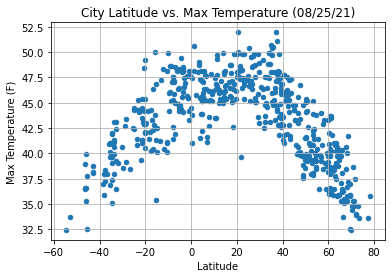

In [45]:
# etablish plot figure
plt.figure()

# Use pandas plot function to generate scatter plot with proper labeling
cities_df.plot.scatter(x='Lat', y='Max Temp', xlabel='Latitude', ylabel='Max Temperature (F)', 
                       title='City Latitude vs. Max Temperature (08/25/21)')

# add gridlines
plt.grid()

# save figure to .png image
plt.savefig('output_data/Fig1.png')

This plot illustrates the max temperature for the day of each city vs. it's latitude.  Basically it shows the relationship between peak daily temperature and distance from the equator.

## Latitude vs. Humidity Plot

<Figure size 432x288 with 0 Axes>

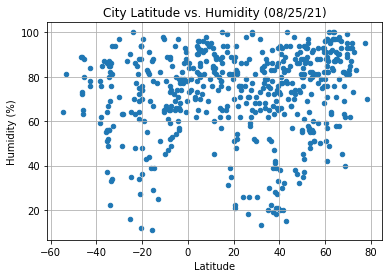

In [47]:
# etablish plot figure
plt.figure()

# Use pandas plot function to generate scatter plot with proper labeling
cities_df.plot.scatter(x='Lat', y='Humidity', xlabel='Latitude', ylabel='Humidity (%)', 
                       title='City Latitude vs. Humidity (08/25/21)')

# add gridlines
plt.grid()

# save figure to .png image
plt.savefig('output_data/Fig2.png')

This plot shows the relationship between distance from the equator (latitude) and humidity percentage at time of data collection.

## Latitude vs. Cloudiness Plot

<Figure size 432x288 with 0 Axes>

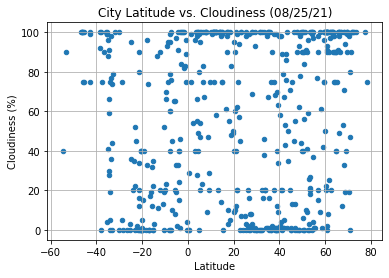

In [48]:
# etablish plot figure
plt.figure()

# Use pandas plot function to generate scatter plot with proper labeling
cities_df.plot.scatter(x='Lat', y='Cloudiness', xlabel='Latitude', ylabel='Cloudiness (%)', 
                       title='City Latitude vs. Cloudiness (08/25/21)')

# add gridlines
plt.grid()

# save figure to .png image
plt.savefig('output_data/Fig3.png')

This plot shows the relationship between distance from the equator (latitude) and cloudcover percentage at the time of data collection.

## Latitude vs. Wind Speed Plot

<Figure size 432x288 with 0 Axes>

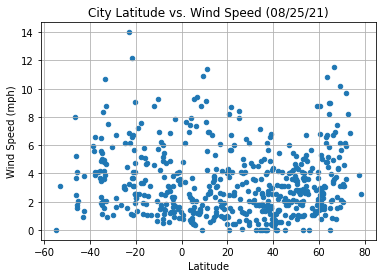

In [49]:
# etablish plot figure
plt.figure()

# Use pandas plot function to generate scatter plot with proper labeling
cities_df.plot.scatter(x='Lat', y='Wind Speed', xlabel='Latitude', ylabel='Wind Speed (mph)', 
                       title='City Latitude vs. Wind Speed (08/25/21)')

# add gridlines
plt.grid()

# save figure to .png image
plt.savefig('output_data/Fig4.png')

This plot shows the relationship between distance from the equator (latitude) and wind speed at the time of data collection.

## Linear Regression

In [66]:
# Pull data for cities above and below the equator into separate dataframes
northern_df = cities_df.loc[cities_df['Lat'] >= 0]
southern_df = cities_df.loc[cities_df['Lat'] < 0]

# print minimum latitude for northern cities and maximum latitude for southern cities to ensure data fits parameters
print(f"Minimum latitude for northern cities: {northern_df['Lat'].min()}")
print(f"Maximum latitude for southern cities: {southern_df['Lat'].max()}")

Minimum latitude for northern cities: 0.5
Maximum latitude for southern cities: -0.2167


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7574819631842368


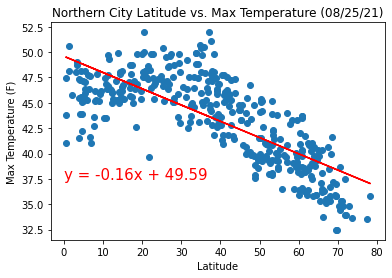

In [61]:
# pull pertinent values into lists to make regression simpler
x_val = northern_df['Lat'].tolist()
y_val = northern_df['Max Temp'].tolist()

# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# generate the regression values using the slope-intercept equation
regress_values = [value * slope + intercept for value in x_val]

# generate the string for regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print the r-value of the regression
print(f"The r-value is: {rvalue}")

# plot the values and the regression
plt.figure()
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")

# add proper plot labels
plt.title('Northern City Latitude vs. Max Temperature (08/25/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# annotate the plot with line equation
plt.annotate(line_eq,(0,37.5),fontsize=15,color="red")

# save figure as png file
plt.savefig('output_data/Fig5n.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7937885620391422


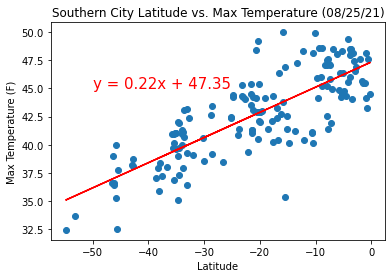

In [64]:
# pull pertinent values into lists to make regression simpler
x_val = southern_df['Lat'].tolist()
y_val = southern_df['Max Temp'].tolist()

# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# generate the regression values using the slope-intercept equation
regress_values = [value * slope + intercept for value in x_val]

# generate the string for regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print the r-value of the regression
print(f"The r-value is: {rvalue}")

# plot the values and the regression
plt.figure()
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")

# add proper plot labels
plt.title('Southern City Latitude vs. Max Temperature (08/25/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# annotate the plot with line equation
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")

# save figure as png file
plt.savefig('output_data/Fig5s.png')

Both plots show a strong correlation between closeness to the equator and maximum temperature. Each plot has a similarly strong correlation coefficient and a trend that shows max temp increasing as latitude approaches zero, the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04358070843874765


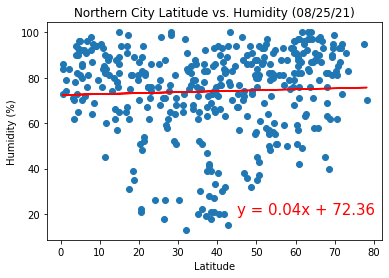

In [70]:
# pull pertinent values into lists to make regression simpler
x_val = northern_df['Lat'].tolist()
y_val = northern_df['Humidity'].tolist()

# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# generate the regression values using the slope-intercept equation
regress_values = [value * slope + intercept for value in x_val]

# generate the string for regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print the r-value of the regression
print(f"The r-value is: {rvalue}")

# plot the values and the regression
plt.figure()
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")

# add proper plot labels
plt.title('Northern City Latitude vs. Humidity (08/25/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# annotate the plot with line equation
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

# save figure as png file
plt.savefig('output_data/Fig6n.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014320669608947696


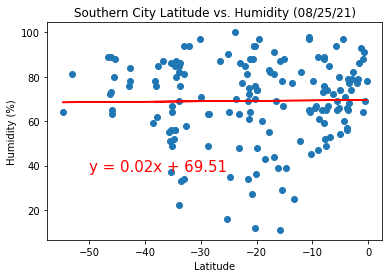

In [73]:
# pull pertinent values into lists to make regression simpler
x_val = southern_df['Lat'].tolist()
y_val = southern_df['Humidity'].tolist()

# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# generate the regression values using the slope-intercept equation
regress_values = [value * slope + intercept for value in x_val]

# generate the string for regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print the r-value of the regression
print(f"The r-value is: {rvalue}")

# plot the values and the regression
plt.figure()
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")

# add proper plot labels
plt.title('Southern City Latitude vs. Humidity (08/25/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# annotate the plot with line equation
plt.annotate(line_eq,(-50,37.5),fontsize=15,color="red")

# save figure as png file
plt.savefig('output_data/Fig6s.png')

The two preceeding plots do not show any evidence of correlation between latitude and humidity percentage.  Both plots have nearly flat slopes and trivially small r-values.  It is thus likely that other factors contribute much more to humidity than distance from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04948973234721212


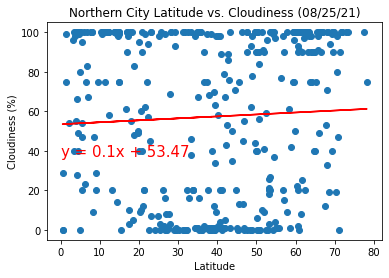

In [75]:
# pull pertinent values into lists to make regression simpler
x_val = northern_df['Lat'].tolist()
y_val = northern_df['Cloudiness'].tolist()

# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# generate the regression values using the slope-intercept equation
regress_values = [value * slope + intercept for value in x_val]

# generate the string for regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print the r-value of the regression
print(f"The r-value is: {rvalue}")

# plot the values and the regression
plt.figure()
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")

# add proper plot labels
plt.title('Northern City Latitude vs. Cloudiness (08/25/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# annotate the plot with line equation
plt.annotate(line_eq,(0,37.5),fontsize=15,color="red")

# save figure as png file
plt.savefig('output_data/Fig7n.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.19324877960443845


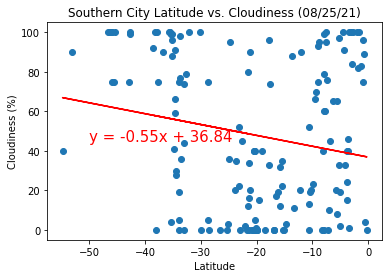

In [80]:
# pull pertinent values into lists to make regression simpler
x_val = southern_df['Lat'].tolist()
y_val = southern_df['Cloudiness'].tolist()

# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# generate the regression values using the slope-intercept equation
regress_values = [value * slope + intercept for value in x_val]

# generate the string for regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print the r-value of the regression
print(f"The r-value is: {rvalue}")

# plot the values and the regression
plt.figure()
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")

# add proper plot labels
plt.title('Southern City Latitude vs. Cloudiness (08/25/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# annotate the plot with line equation
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")

# save figure as png file
plt.savefig('output_data/Fig7s.png')

The two cloudiness plots don't show evidence of any real correlation with latitude.  Both regressions have r-values suggesting either no or at most very slight correlation between latitude and cloudiness percentage.  It is likely that other factors are responsible for determining cloud cover.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09503863116109634


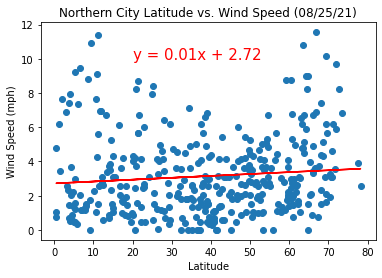

In [83]:
# pull pertinent values into lists to make regression simpler
x_val = northern_df['Lat'].tolist()
y_val = northern_df['Wind Speed'].tolist()

# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# generate the regression values using the slope-intercept equation
regress_values = [value * slope + intercept for value in x_val]

# generate the string for regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print the r-value of the regression
print(f"The r-value is: {rvalue}")

# plot the values and the regression
plt.figure()
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")

# add proper plot labels
plt.title('Northern City Latitude vs. Wind Speed (08/25/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# annotate the plot with line equation
plt.annotate(line_eq,(20, 10),fontsize=15,color="red")

# save figure as png file
plt.savefig('output_data/Fig8n.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14321167820577999


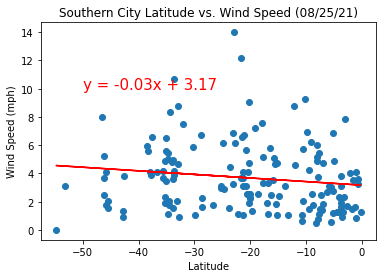

In [86]:
# pull pertinent values into lists to make regression simpler
x_val = southern_df['Lat'].tolist()
y_val = southern_df['Wind Speed'].tolist()

# use scipy.stats.linregress to determine the regression parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# generate the regression values using the slope-intercept equation
regress_values = [value * slope + intercept for value in x_val]

# generate the string for regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# print the r-value of the regression
print(f"The r-value is: {rvalue}")

# plot the values and the regression
plt.figure()
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")

# add proper plot labels
plt.title('Southern City Latitude vs. Wind Speed (08/25/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# annotate the plot with line equation
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")

# save figure as png file
plt.savefig('output_data/Fig8s.png')

The final two plots do not indicate a correlation between latitude and wind speed for the surveyed cities.  Both regressions showed slopes close to zero and very small correlation coefficients.  Other factors are likely to be primary contributors to wind speed. 